In [7]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib as mpl
import pandas as pd
import seaborn as sns

import sys
import os

In [8]:

# Get the current working directory
current_dir = os.getcwd()

# Navigate to 'network_simulations'
parent_dir = os.path.abspath(os.path.join(current_dir, ".."))

# Navigate to the sibling directory '00_opinion_function_setup'
sibling_dir = os.path.join(parent_dir, "00_opinion_function_setup")

# Add the sibling directory to sys.path for importing
if sibling_dir not in sys.path:
    sys.path.append(sibling_dir)

# Import the module from 00_opinion_function_setup
import opinion_functions as fun  
import generate_homophilic_graph_symmetric

## Plotting parameters

In [9]:
SMALL_SIZE = 12
MEDIUM_SIZE = 12
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

colors=['#19bdff','#f2d138'] #majority/minority
greycolor='#626262'
lightgreycolor='#c4c4c4'

In [4]:
modelylim=200
num_swaps=100
homophily=0.75
num_agents=1000
minority_fraction=0.333
majority_fraction=1-minority_fraction
m=5
random.seed(101) #for reproducibility
G,minority_nodes = generate_homophilic_graph_symmetric.homophilic_ba_graph(N=num_agents, m=m, minority_fraction=minority_fraction, homophily=homophily)
dpival=300

true_opinion,perceived_opinion=fun.generate_perceived_opinion(G,minority_nodes,{},narcissistic=False,weigh_connected=False)

minority_opinion = [perceived_opinion[i] for i in minority_nodes]
minority_misperception = [(1-minority_fraction)-perceived_opinion[i] for i in minority_nodes]
majority_opinion = [perceived_opinion[x] for x in np.arange(len(perceived_opinion)) if x not in minority_nodes]
majority_misperception = [(1-minority_fraction)-perceived_opinion[x] for x in np.arange(len(perceived_opinion)) if x not in minority_nodes]

perceived_opinion_percent = [i * 100 for i in perceived_opinion]
majority_opinion_percent=[i * 100 for i in majority_opinion]
minority_opinion_percent=[i * 100 for i in minority_opinion]


for i in range(num_swaps):
    print(i)
    G,new_minority_nodes=fun.swap_top_maj_opinion(G,minority_nodes)
    # print(minority_nodes)
    # print(new_minority_nodes)
    true_opinion,perceived_opinion=fun.generate_perceived_opinion(G,new_minority_nodes,{},narcissistic=False,weigh_connected=False)
    print(0.66-np.sum(perceived_opinion)/num_agents)

    minority_opinion = [perceived_opinion[i] for i in minority_nodes]
    print(len(perceived_opinion))
    minority_misperception = [(1-minority_fraction)-perceived_opinion[i] for i in minority_nodes]
    majority_opinion = [perceived_opinion[x] for x in np.arange(len(perceived_opinion)) if x not in minority_nodes]
    majority_misperception = [(1-minority_fraction)-perceived_opinion[x] for x in np.arange(len(perceived_opinion)) if x not in minority_nodes]

    perceived_opinion_percent = [i * 100 for i in perceived_opinion]
    majority_opinion_percent=[i * 100 for i in majority_opinion]
    minority_opinion_percent=[i * 100 for i in minority_opinion]


0
-0.02528645864028456
1000
1
-0.014440100729987693
1000
2
-0.006096355037636947
1000
3
0.002037770662406846
1000
4
0.00860241635510739
1000
5
0.01523584803993483
1000
6
0.02103674583228743
1000
7
0.027182002624362434
1000
8
0.03282523660262948
1000
9
0.03863378883530422
1000
10
0.04488207247256626
1000
11
0.050929014013408436
1000
12
0.05629119256102544
1000
13
0.06033844199462901
1000
14
0.06523459497708428
1000
15
0.07015932900285704
1000
16
0.07482415729542913
1000
17
0.07894988613382004
1000
18
0.08345495450744811
1000
19
0.08837963121312065
1000
20
0.09203251054864969
1000
21
0.09521205469823779
1000
22
0.09868378757492435
1000
23
0.1027101754369053
1000
24
0.10620217601135185
1000
25
0.1082005674508082
1000
26
0.1120826096166353
1000
27
0.11534902327544028
1000
28
0.11755080221801317
1000
29
0.12060160561343425
1000
30
0.123520433854308
1000
31
0.12618223860985367
1000
32
0.12897193415154817
1000
33
0.13188699412928084
1000
34
0.134425390058174
1000
35
0.1368406295971334
1000
36

In [5]:
letterheight=1.035

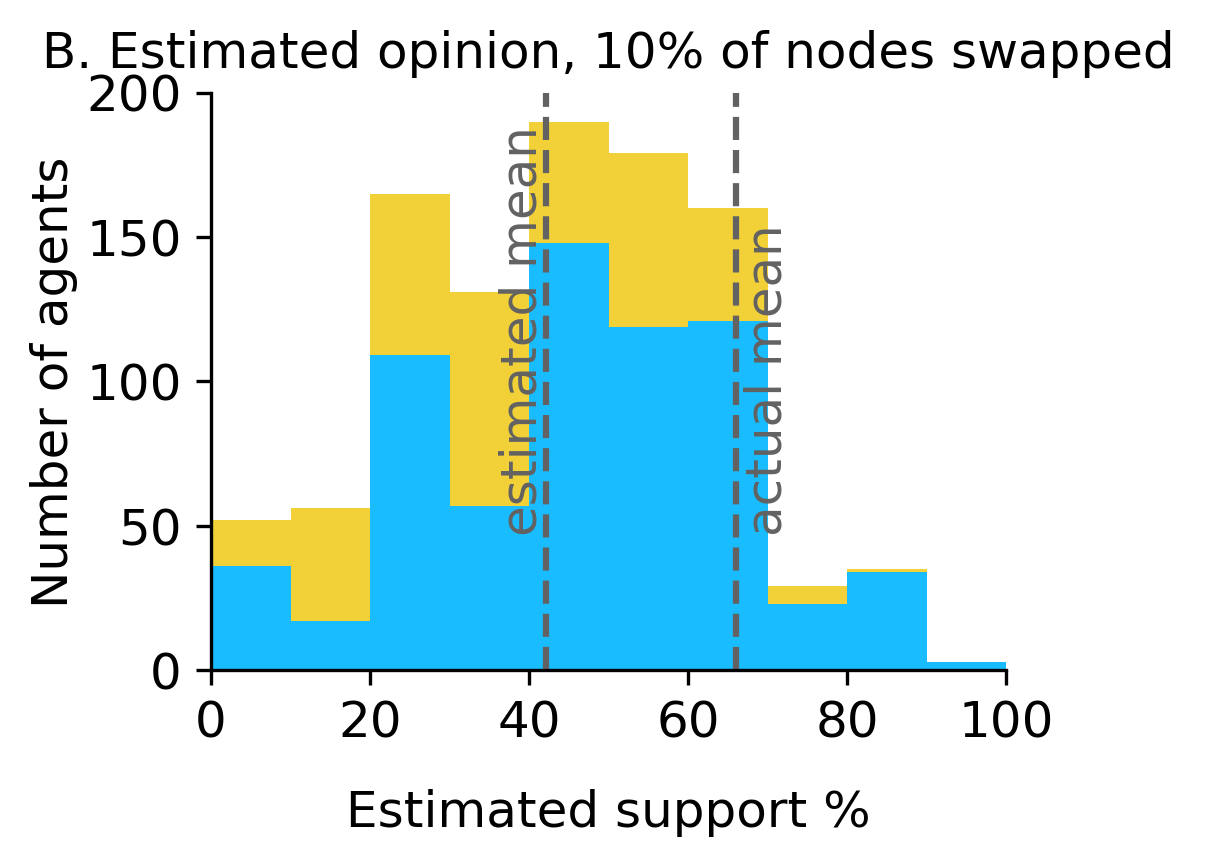

In [13]:

fig, axs = plt.subplots(1, 1, dpi=dpival, figsize=(3.42, 2.5))

axs.hist([majority_opinion_percent, minority_opinion_percent], 10, histtype='bar', stacked=True, color=colors, density=False)
axs.set_xlabel("Estimated support %", labelpad=10, size=SMALL_SIZE)
axs.set_ylabel("Number of agents", labelpad=2, size=SMALL_SIZE)
axs.axvline(x=66, color=greycolor, linestyle='--')
axs.text(66+1, 50, 'actual mean', rotation=90, color=greycolor)
axs.axvline(x=np.mean(perceived_opinion_percent), color=greycolor, linestyle='--')
axs.text(np.mean(perceived_opinion_percent)-6, 50, 'estimated mean', rotation=90, color=greycolor)
axs.set_xlim(0, 100)
axs.set_ylim(0, modelylim)
axs.set_title('B. Estimated opinion, 10% of nodes swapped',size=MEDIUM_SIZE)

sns.despine()

fig.savefig("../99_figures/sample_opinion_dis_0p1_swaps.pdf", format="pdf", bbox_inches="tight")
plt.show()